
# <span style="color:rgb(213,80,0)">Examples of the different control policies</span>

We run the same examples for the different control policies

-  <samp>CCDischarge</samp>
-  <samp>CCCharge</samp>
-  <samp>CCCV</samp>

## Setup json input

We load some parameter sets for the material property and geometry


In [1]:
jsonfilename = fullfile('ParameterData', 'BatteryCellParameters', 'LithiumIonBatteryCell', ...
                        'lithium_ion_battery_nmc_graphite.json');

jsonstruct_material = parseBattmoJson(jsonfilename);

jsonfilename = fullfile('Examples', 'JsonDataFiles', 'geometry1d.json');
jsonstruct_geometry = parseBattmoJson(jsonfilename);


We merge the material and geometrical parameters in <samp>jsonstruct</samp>


In [2]:
jsonstruct = mergeJsonStructs({jsonstruct_geometry , ...
                               jsonstruct_material
                              });

## Setup Constant Current Discharge control and run simulation

In [3]:
jsonstruct.Control = struct('controlPolicy'     , 'CCDischarge', ...
                            'rampupTime'        , 0.1          , ...
                            'DRate'             , 1            , ...
                            'lowerCutoffVoltage', 2.4);

output = runBatteryJson(jsonstruct);


We plot the results



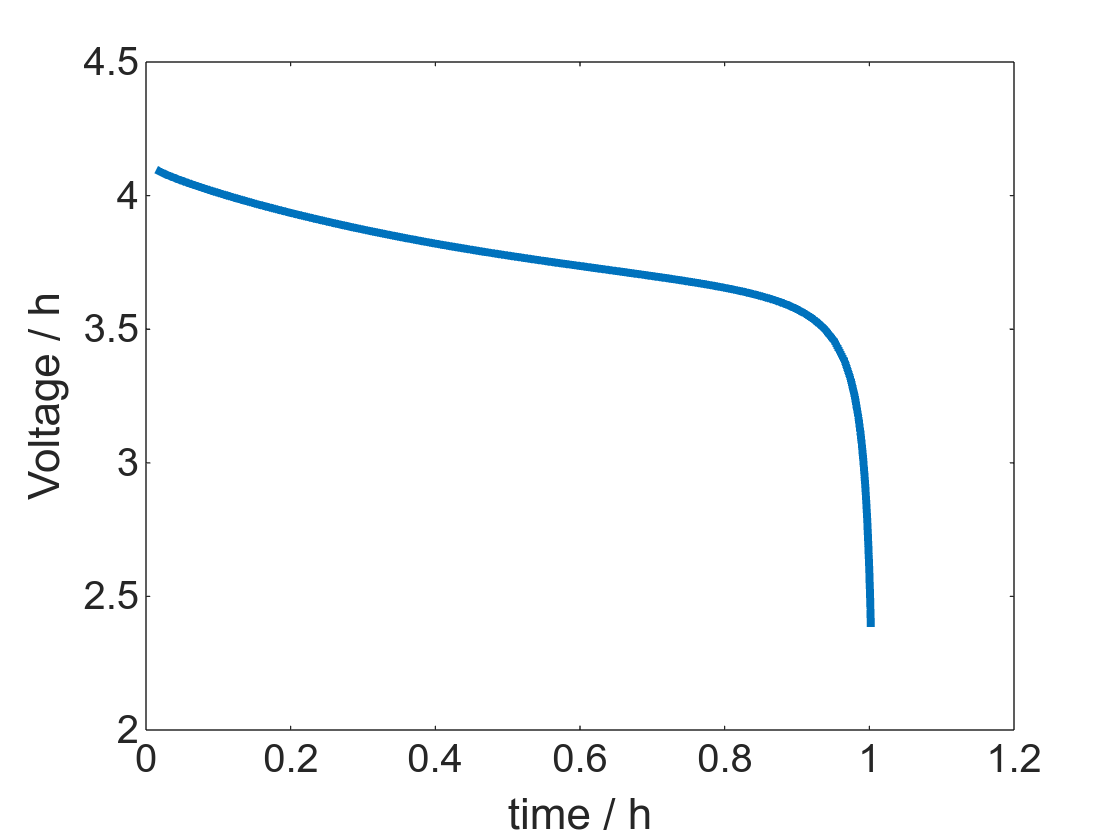

In [4]:
set(0, 'defaulttextfontsize', 15);
set(0, 'defaultaxesfontsize', 15);
set(0, 'defaultlinelinewidth', 3);

figure
states = output.states;
time = cellfun(@(state) state.time, states);
E    = cellfun(@(state) state.Control.E, states);
plot(time/hour, E);
xlabel('time / h');
ylabel('Voltage / h');

## Setup Constant Current Charge control and run simulation

In [5]:
jsonstruct.Control = struct('controlPolicy'     , 'CCCharge', ...
                            'rampupTime'        , 0.1       , ...
                            'CRate'             , 1         , ...
                            'upperCutoffVoltage', 4.1);


We change the state of charge (from 0.99 to 0.01)


In [6]:
jsonstruct.SOC = 0.01;


By default the simulation time is set to 1.4/(DRate) hour. We can change that


In [7]:
jsonstruct.TimeStepping.totalTime = 2*hour;


We run the simulation


In [8]:
output = runBatteryJson(jsonstruct);

## Plot Results


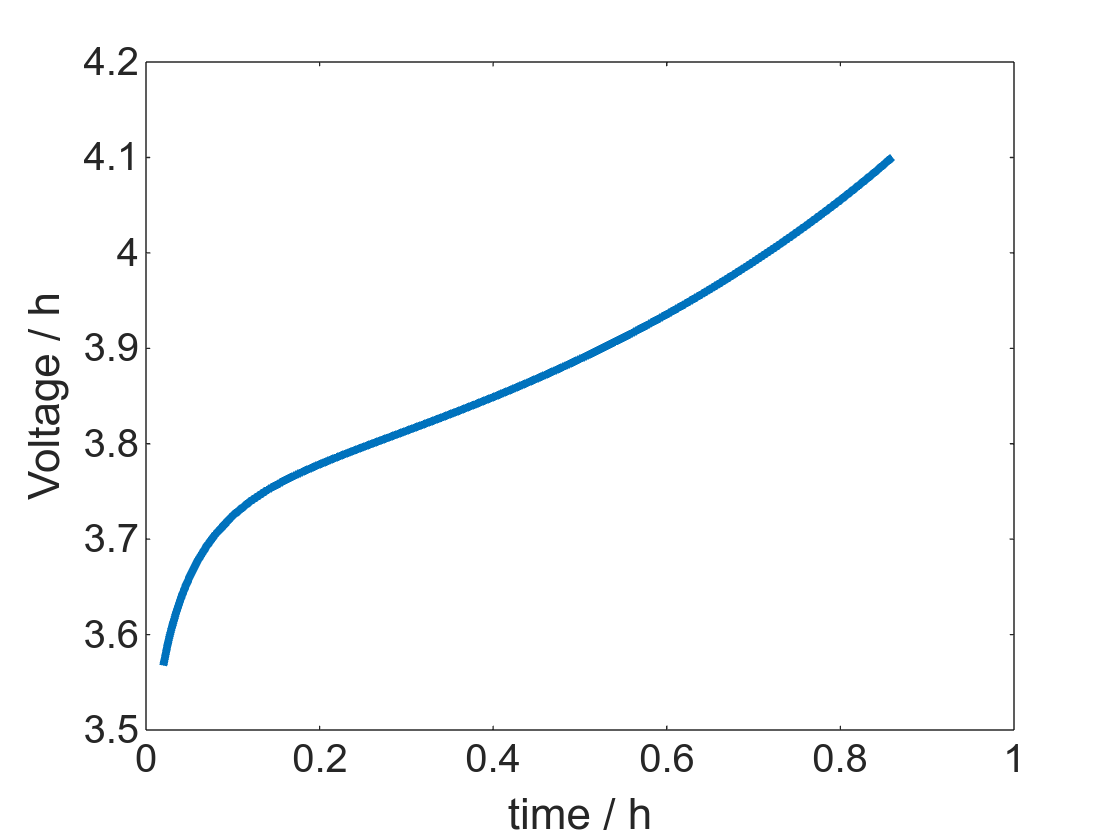

In [9]:
set(0, 'defaulttextfontsize', 15);
set(0, 'defaultaxesfontsize', 15);
set(0, 'defaultlinelinewidth', 3);
figure
states = output.states;
time = cellfun(@(state) state.time, states);
E    = cellfun(@(state) state.Control.E, states);
plot(time/hour, E);
xlabel('time / h');
ylabel('Voltage / h');

## Setup Constant Current Constant Voltage control and run the simulation

In [10]:
jsonstruct.SOC = 0.99;
jsonstruct.Control = struct('controlPolicy'     , 'CCCV'       , ...
                            'initialControl'    , 'discharging', ...
                            'numberOfCycles'    , 2            , ...
                            'CRate'             , 1.5          , ...
                            'DRate'             , 1            , ...
                            'lowerCutoffVoltage', 2.4          , ...
                            'upperCutoffVoltage', 4            , ...
                            'dIdtLimit'         , 2e-6         , ...
                            'dEdtLimit'         , 2e-6);


We run the simulation


In [11]:
output = runBatteryJson(jsonstruct);

## Plot Results


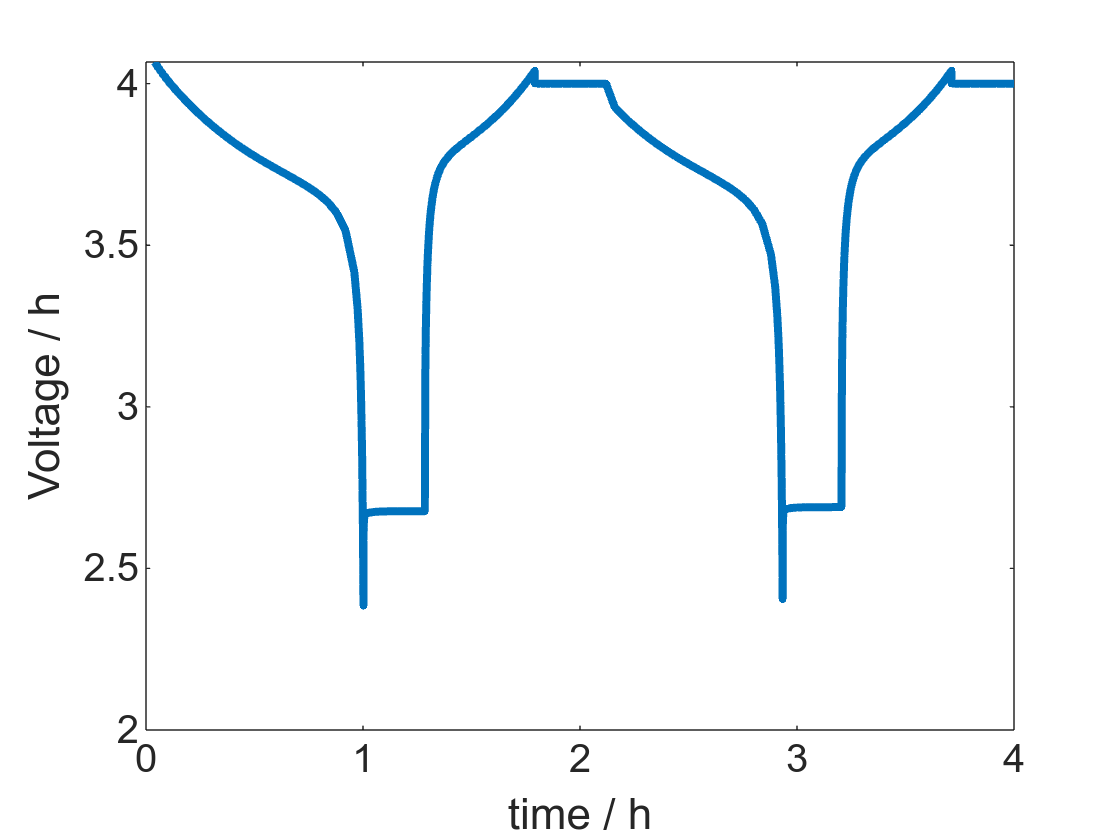

In [12]:
set(0, 'defaulttextfontsize', 15);
set(0, 'defaultaxesfontsize', 15);
set(0, 'defaultlinelinewidth', 3);
figure
states = output.states;
time = cellfun(@(state) state.time, states);
E    = cellfun(@(state) state.Control.E, states);
plot(time/hour, E);
xlabel('time / h');
ylabel('Voltage / h');